In [ ]:
# importing liberies 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# loading dataset

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Exploring dataset

In [8]:
# checking shape
df.shape

(213, 11)

In [9]:
# checking null values
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [10]:
df.value_counts()

1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00    1      1
136  1.51789  13.19  3.90  1.30  72.33  0.55  8.44  0.00  0.28    2      1
138  1.51711  12.89  3.62  1.57  72.96  0.61  8.11  0.00  0.00    2      1
139  1.51674  12.79  3.52  1.54  73.36  0.66  7.90  0.00  0.00    2      1
140  1.51674  12.87  3.56  1.64  73.14  0.65  7.99  0.00  0.00    2      1
                                                                        ..
76   1.51590  13.02  3.58  1.51  73.12  0.69  7.96  0.00  0.00    2      1
77   1.51645  13.44  3.61  1.54  72.39  0.66  8.03  0.00  0.00    2      1
78   1.51627  13.00  3.58  1.54  72.83  0.61  8.04  0.00  0.00    2      1
79   1.51613  13.92  3.52  1.25  72.88  0.37  7.94  0.00  0.14    2      1
214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00    7      1
Length: 213, dtype: int64

In [11]:
#data describe
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


we can see from above statistics that all data  not in same range

# Renaming the datasets

In [12]:
# giving  meaningful names to dataset
names = ['Id','RI','Na','Mg','AI','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


we can now see the dataset after renaming the dataset

# Removing unwanted columns

In [13]:
 df.drop('Id',1)


C:\Users\kiran\AppData\Local\Temp\ipykernel_18856\375877276.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Id',1)


,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


we can notice the id column is not exist in the upper dataset

# Checking Outliers

In [14]:
z=abs(stats.zscore(df))
#np.where(z > 3)
df= df[(z<3).all(axis=1)]
df.shape

(193, 11)

# Separating Features and Label

In [15]:
features = ['RI','Na','Mg','AI','Si','K','Ca','Ba','Fe']
label = ['glass_type']

x = df[features]
y = df[label]

In [16]:
x.shape

(193, 9)

In [17]:
type (x)

pandas.core.frame.DataFrame

# Data Visualization

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


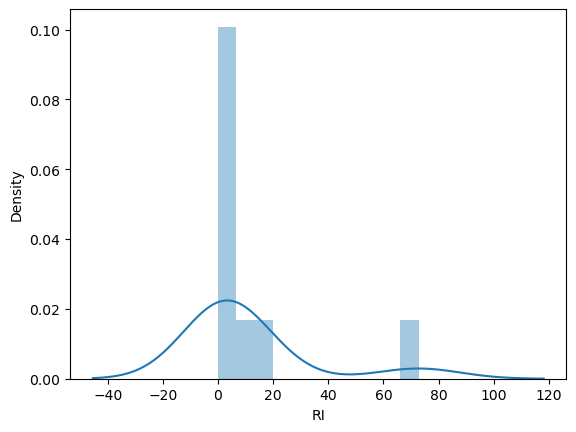

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


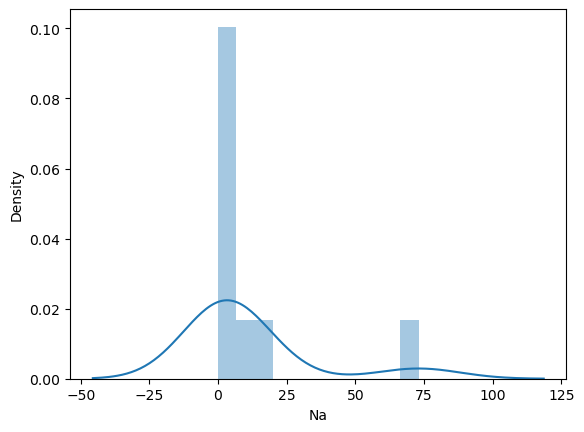

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


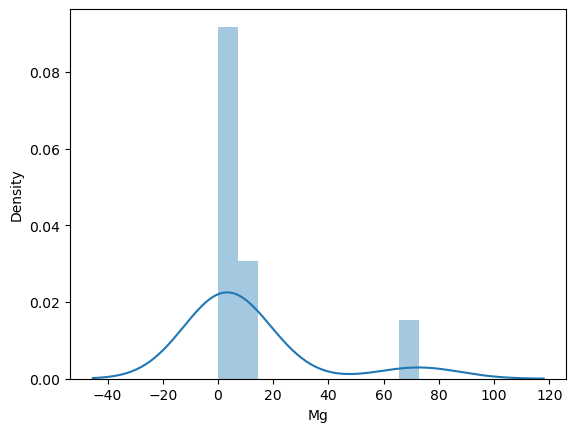

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


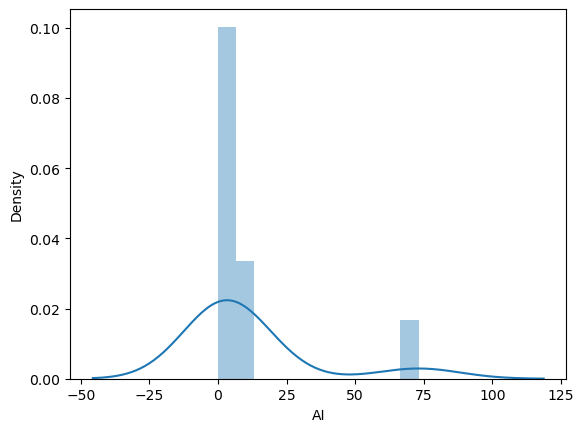

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


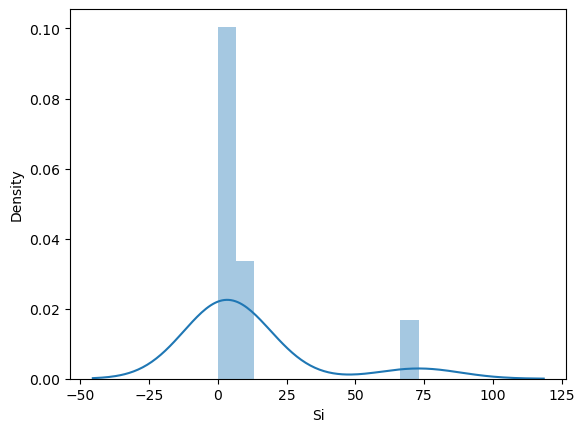

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


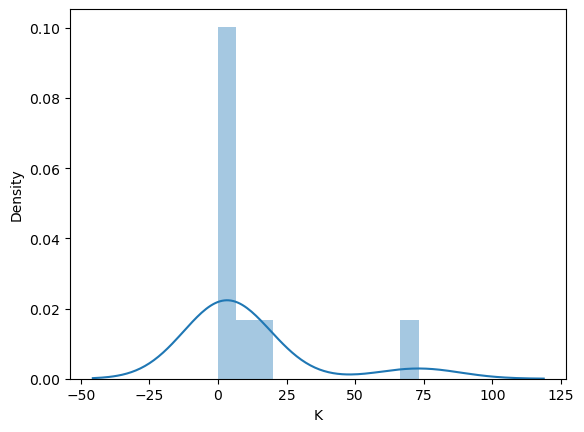

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


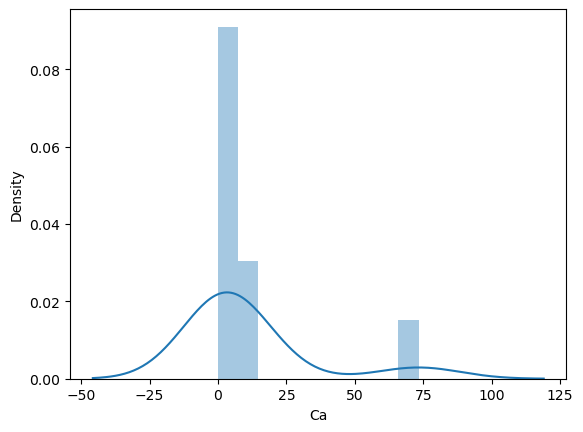

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


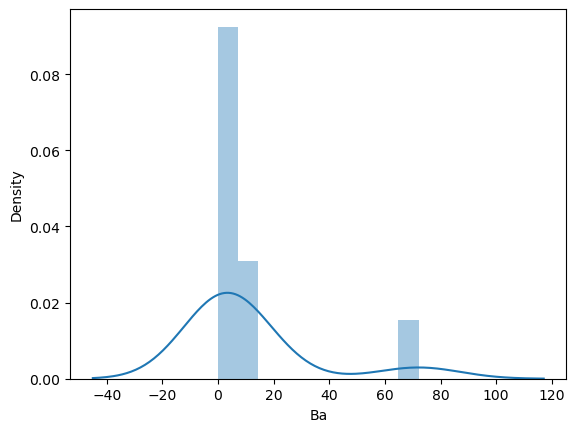

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


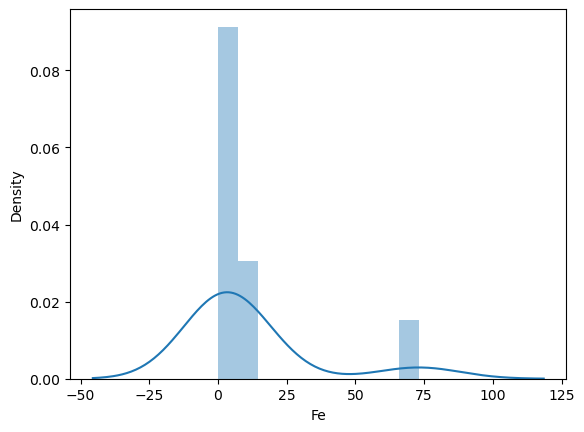

In [18]:
x2 = x.values
for i in range(0,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

in above plots we can see that data is not nomally distributed

<Figure size 1000x1000 with 0 Axes>

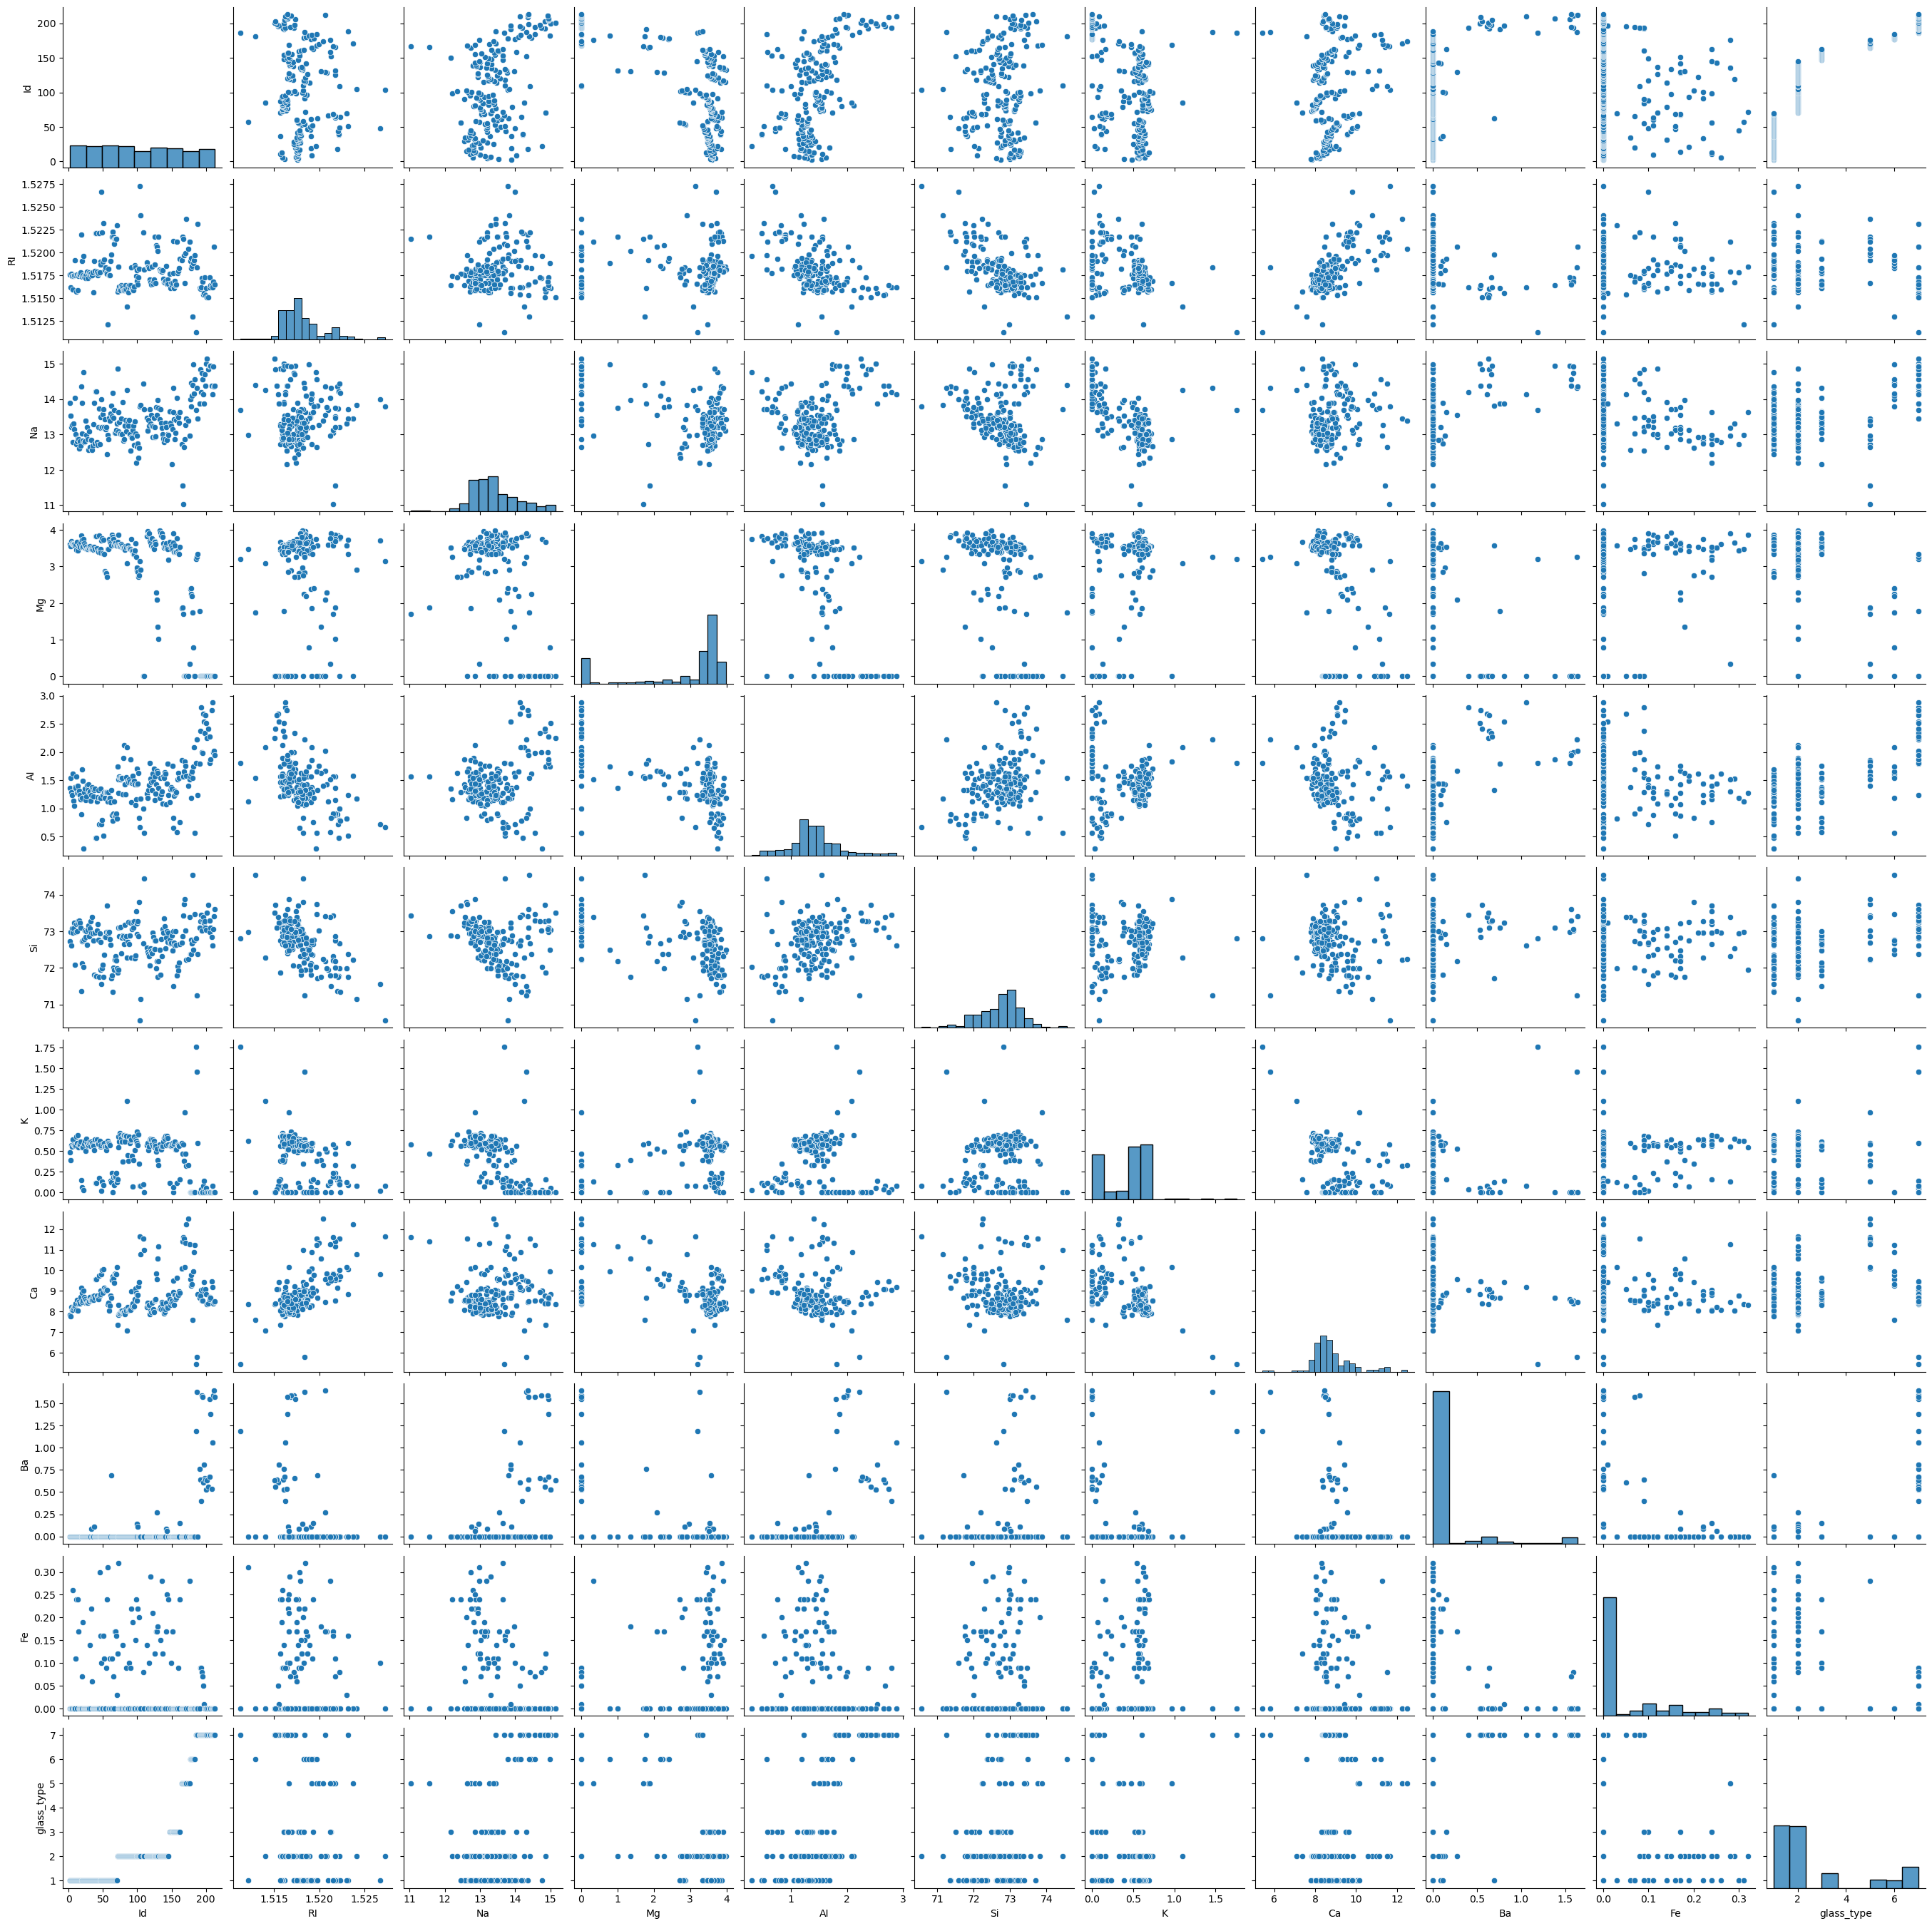

In [19]:
x2 = pd.DataFrame(x)
plt.figure(figsize=(10,10))
sns.pairplot(data=df)
plt.show()

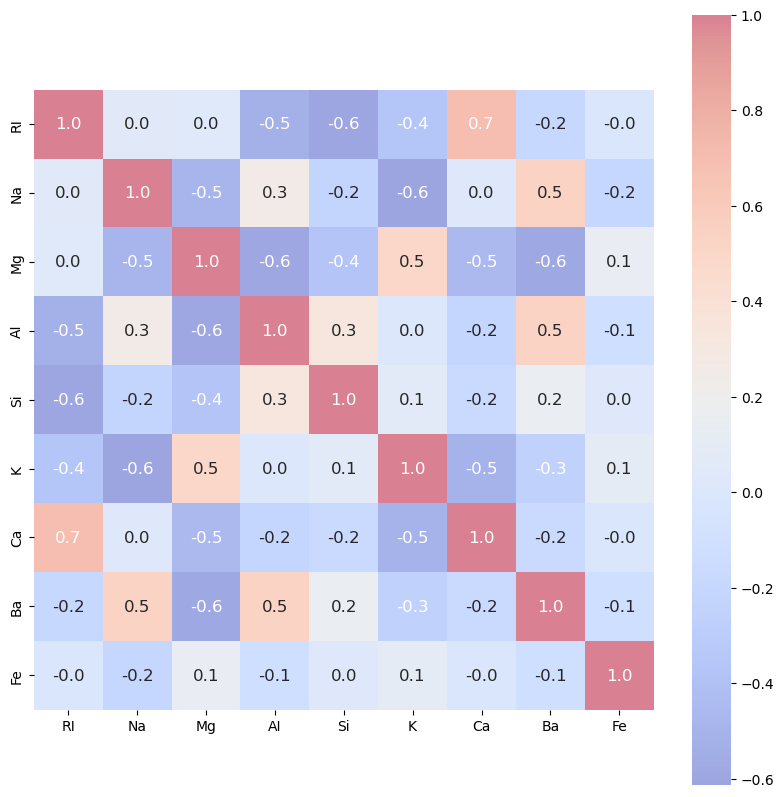

In [20]:
# heatmap 
corelation = x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True,square = True,annot = True,fmt ='.1f',annot_kws={'size':12},xticklabels=features,yticklabels=features,alpha=0.5,cmap='coolwarm')
plt.show()

above plot shows the correlation between different features

# data scaling

In [21]:
scaler = MinMaxScaler()
scaler.fit(x)
#x=scaler.transform(x)
#x=pd.DataFrame(x)

MinMaxScaler()

In [22]:
x.head()

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [23]:
y.head()

,glass_type
0,1
1,1
2,1
3,1
4,1


# Scaling the Features

In [24]:
x=preprocessing.scale(x)

# Data visualization after preprocessing

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


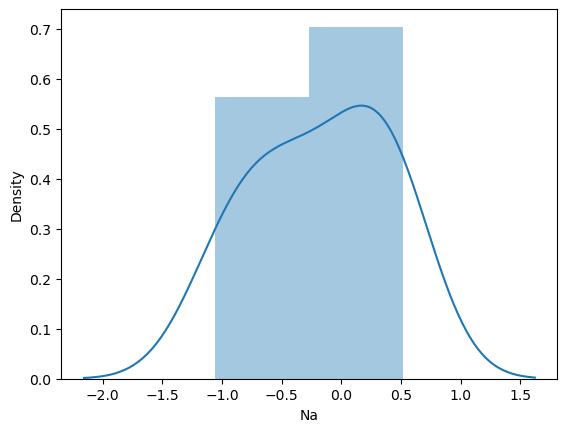

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


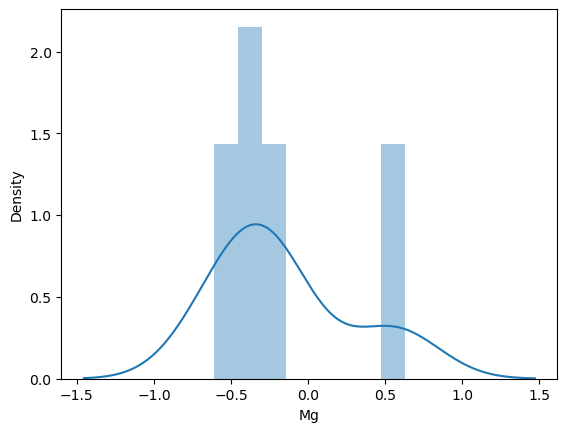

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


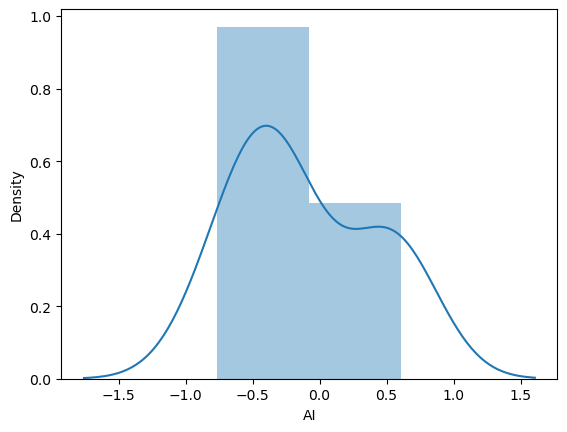

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


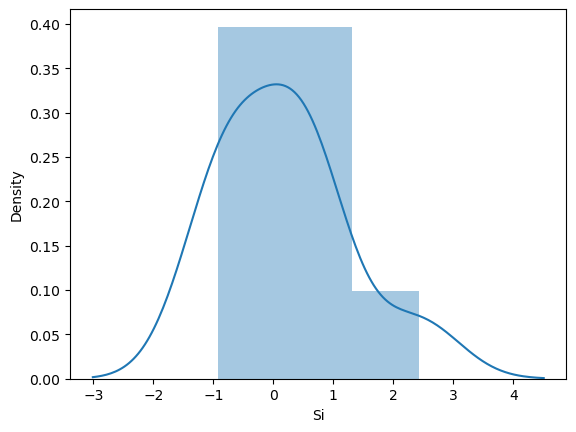

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


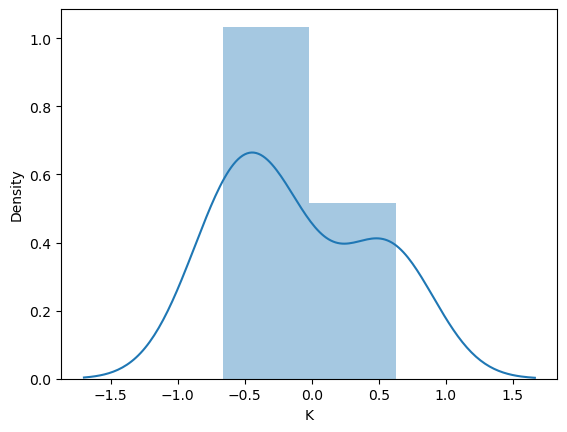

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


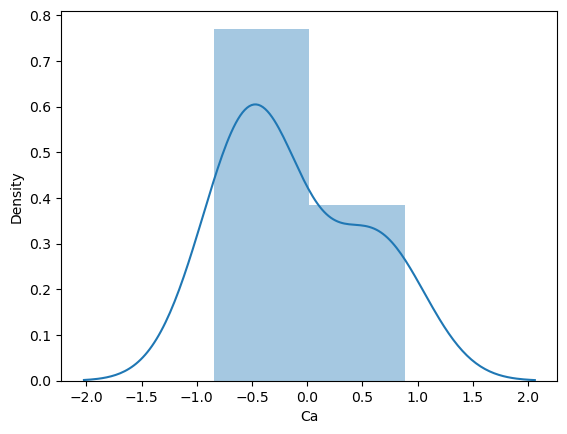

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


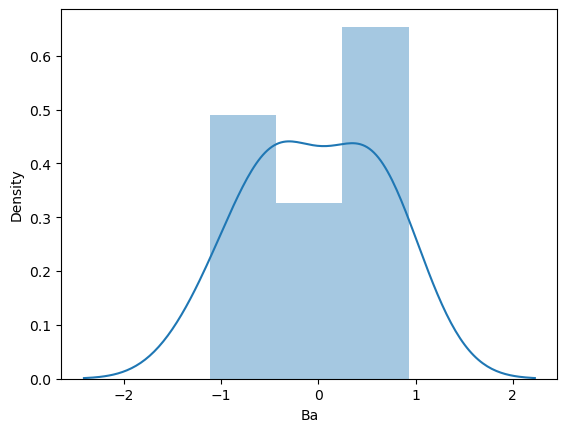

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


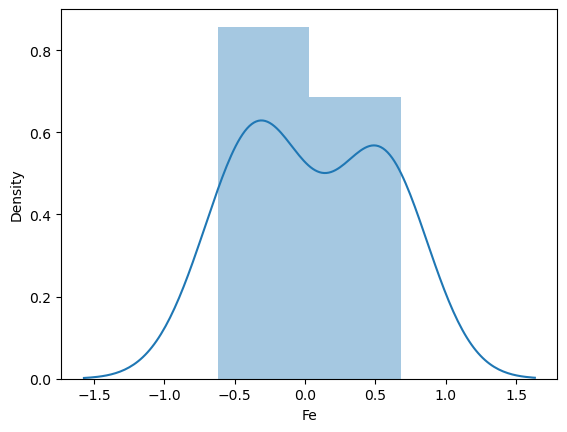

In [30]:
x2 = x
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

we can notice the skewness is reduced and data looks normalize

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0,stratify=y)

In [32]:
print('x_train shape= ' + str(x_train.shape))
print('x_test shape= ' + str(x_test.shape))
print('y_train shape= ' + str(y_train.shape))
print('y_test shape= ' + str(y_test.shape))

x_train shape= (144, 9)
x_test shape= (49, 9)
y_train shape= (144, 1)
y_test shape= (49, 1)


# applying model 
SVM

In [34]:
from sklearn.svm import SVC
score=[]


for i in  range (1):
    svc=SVC(gamma='auto')
    svc.fit(x_train,y_train)
    score=svc.score(x_test,y_test)
   # score.append(score)
    
    print(svc.score(x_train,y_train))
    print(score)

0.7569444444444444
0.7551020408163265


C:\Users\kiran\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
